<a href="https://colab.research.google.com/github/kris-peshkepia/colab/blob/main/Twitter_Sentiment_Analysis_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference article & YouTube Video:

https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082

https://youtu.be/ujId4ipkBio

# **Twitter Sentiment Analysis Using Python**

> Description: This is a sentiment analysis program that parses the tweets fetched from Twitter using Python


In [2]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [8]:
# Load the data
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Get the data
log = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Login.csv")

# Twitter Api Credentials
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [15]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [18]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) RT @codeorg: Only 3% of Black students learn computer science in high school or beyond. Please watch and share this video. Inspire a studen…

2) RT @rajpanjabi: After being sworn in this morning, I'm honored to share that I've been appointed by @POTUS as the President’s Malaria Coord…

3) When it comes to preventing pandemics, scientific tools alone aren’t enough. We also need new capabilities, including a global alert system and infectious disease first responders (or what I like to call a pandemic fire squad): https://t.co/53Rf5uvjub https://t.co/rTmM7STl6U

4) COVID-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. But hope is on the horizon: https://t.co/clsscPwQUD https://t.co/sNl4kT9bE3

5) This has been a year unlike any other in our lifetimes. In our new Annual Letter, Melinda and I talk about how we can turn the hard-won lessons of the pandemic into a healthier, more equal future for all. https://t.c

In [20]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,RT @codeorg: Only 3% of Black students learn c...
1,RT @rajpanjabi: After being sworn in this morn...
2,"When it comes to preventing pandemics, scienti..."
3,"COVID-19 has cost lives, sickened millions, an..."
4,This has been a year unlike any other in our l...


In [21]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,: Only 3% of Black students learn computer sci...
1,": After being sworn in this morning, I'm honor..."
2,"When it comes to preventing pandemics, scienti..."
3,"COVID-19 has cost lives, sickened millions, an..."
4,This has been a year unlike any other in our l...
...,...
95,The progress the world has made against malari...
96,"Move aside, . This is the still the world’s de..."
97,: A safe and effective COVID19 vaccine is the ...
98,Because of long-standing barriers that are mad...


In [22]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,: Only 3% of Black students learn computer sci...,0.657778,-0.002222
1,": After being sworn in this morning, I'm honor...",0.000000,0.000000
2,"When it comes to preventing pandemics, scienti...",0.321970,0.096591
3,"COVID-19 has cost lives, sickened millions, an...",0.500000,-0.500000
4,This has been a year unlike any other in our l...,0.340909,0.102273
...,...,...,...
95,The progress the world has made against malari...,0.575000,0.325000
96,"Move aside, . This is the still the world’s de...",0.000000,0.000000
97,: A safe and effective COVID19 vaccine is the ...,0.766667,0.033333
98,Because of long-standing barriers that are mad...,0.600000,-0.333333


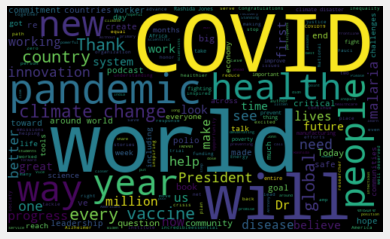

In [23]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df


,Tweets,Subjectivity,Polarity,Analysis
0,: Only 3% of Black students learn computer sci...,0.657778,-0.002222,Negative
1,": After being sworn in this morning, I'm honor...",0.000000,0.000000,Neutral
2,"When it comes to preventing pandemics, scienti...",0.321970,0.096591,Positive
3,"COVID-19 has cost lives, sickened millions, an...",0.500000,-0.500000,Negative
4,This has been a year unlike any other in our l...,0.340909,0.102273,Positive
...,...,...,...,...
95,The progress the world has made against malari...,0.575000,0.325000,Positive
96,"Move aside, . This is the still the world’s de...",0.000000,0.000000,Neutral
97,: A safe and effective COVID19 vaccine is the ...,0.766667,0.033333,Positive
98,Because of long-standing barriers that are mad...,0.600000,-0.333333,Negative


In [27]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) When it comes to preventing pandemics, scientific tools alone aren’t enough. We also need new capabilities, including a global alert system and infectious disease first responders (or what I like to call a pandemic fire squad):  

2) This has been a year unlike any other in our lifetimes. In our new Annual Letter, Melinda and I talk about how we can turn the hard-won lessons of the pandemic into a healthier, more equal future for all. 

3) : I believe that women can be the architects of a better world. 

Their stories have instilled in me both a sense of urgenc…

4) One of the benefits of being 65 is that I’m eligible for the COVID-19 vaccine. I got my first dose this week, and I feel great. Thank you to all of the scientists, trial participants, regulators, and frontline healthcare workers who got us to this point. 

5) It’s great to see President Biden elevate science leadership to a cabinet-level position. Congratulations _lander. 

6) And while COVID-1

In [28]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1


Printing negative tweets:

1) : Only 3% of Black students learn computer science in high school or beyond. Please watch and share this video. Inspire a studen…

2) COVID-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. But hope is on the horizon:  

3) Here are four other ways that America can advance its leadership on climate change this year and put the world on a path to zero emissions by 2050:  

4) The President’s commitment to reengage with the world gives me hope that the recovery will reach everyone, including communities of color in the U.S. and people in poor countries around the world.

5) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

6) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s 

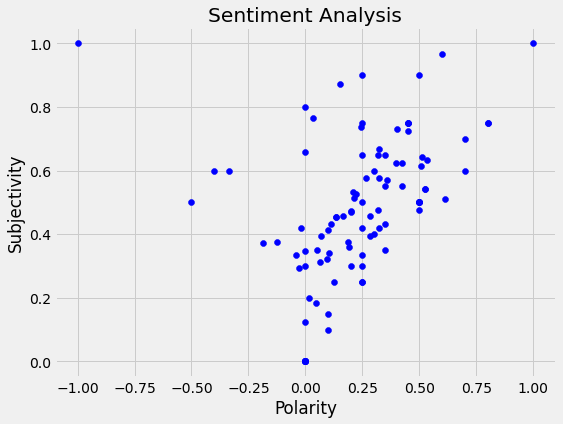

In [29]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [30]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

77.0

In [31]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


10.0

In [32]:
# Show the value counts
df['Analysis'].value_counts()

Positive    77
Neutral     13
Negative    10
Name: Analysis, dtype: int64

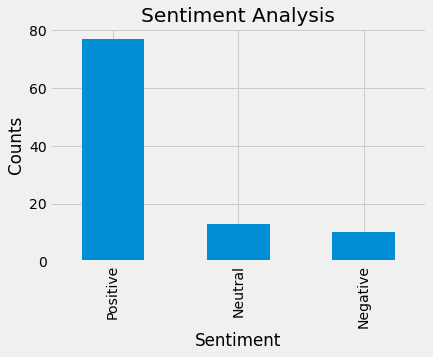

In [33]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
